<a href="https://colab.research.google.com/github/kypercoding/diabetes-prediction/blob/main/Diabetes_Prediction_(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes Condition Based on Categorical Features

The goal of this code is to develop a classification model(s) that can accurately predict whether someone will get diabetes based on a set of health-based factors, as well as determine which of those factors has the greatest effect on accuracy. To compare which factors have the most efffect on accuracy, a baseline Logistic Regression model will first be trained with all categorical factors. Then, each factor will be removed, and a new Logistic Regression model will be trained on the data without said factor. 

## Libraries And Dataset Used

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler

# import the CSV file into the dataframe object
df = pd.read_csv("https://raw.githubusercontent.com/kypercoding/diabetes-prediction/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

## Data Structure

In [ ]:
###
# Data Exploration: exploring columns, counting data points, etc.
###

# print all column names
print(df.dtypes)

# view columns
df.describe()

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Building Models

In [ ]:
# dictionary of empty models
models = {
    "LogReg": LogisticRegression(max_iter=500, C=0.001),
}

# dictionary of trained models
trained_models = {}

# get all factors potentially contributing to diabetes, and remove
# the diabetes column
factors = list(df.columns)
output = "Diabetes_binary"
factors.remove(output)

seed = 1

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[factors], df[output], random_state=seed)

# number of data points per training/testing set
print("Training Size:", len(x_train))
print("Testing Size:", len(x_test))
print("Seed:", seed)

print()
print("=== Beginning Training Process ===")
print()

factors.append("")
scaler = StandardScaler()

# for each model, make a new copy, train it, and add it to a list of trained models
for factor in factors:
  print("Removing Factor: {}".format(factor))

  if factor != "":
    train_copy = x_train.drop(columns=[factor]).copy()
    test_copy = x_test.drop(columns=[factor]).copy()
  else:
    train_copy = x_train.copy()
    test_copy = x_test.copy()
  
  # scale the input data
  train_copy = scaler.fit_transform(train_copy)
  test_copy = scaler.fit_transform(test_copy)

  for model in models:
    print("Training Model:", model)

    # get empty model
    m = models[model]

    # fit empty model to training data
    trained_model = clone(m).fit(train_copy, y_train)

    # generate predictions of model
    y_pred = trained_model.predict(test_copy)

    # add trained model to dictionary of trained models
    trained_models[model + " (Without {})".format(factor)] = {
      "model": trained_model,
      "y_pred": y_pred
    }

Training Size: 53019
Testing Size: 17673
Seed: 1

=== Beginning Training Process ===

Removing Factor: HighBP
Training Model: LogReg
Removing Factor: HighChol
Training Model: LogReg
Removing Factor: CholCheck
Training Model: LogReg
Removing Factor: BMI
Training Model: LogReg
Removing Factor: Smoker
Training Model: LogReg
Removing Factor: Stroke
Training Model: LogReg
Removing Factor: HeartDiseaseorAttack
Training Model: LogReg
Removing Factor: PhysActivity
Training Model: LogReg
Removing Factor: Fruits
Training Model: LogReg
Removing Factor: Veggies
Training Model: LogReg
Removing Factor: HvyAlcoholConsump
Training Model: LogReg
Removing Factor: AnyHealthcare
Training Model: LogReg
Removing Factor: NoDocbcCost
Training Model: LogReg
Removing Factor: GenHlth
Training Model: LogReg
Removing Factor: MentHlth
Training Model: LogReg
Removing Factor: PhysHlth
Training Model: LogReg
Removing Factor: DiffWalk
Training Model: LogReg
Removing Factor: Sex
Training Model: LogReg
Removing Factor: A

In [ ]:
# create dataset of accuracies, precisions, and recalls for each
# factor removed
model_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall"])

for item in trained_models:
  # get model
  m = trained_models[item]

  # make model row
  row = pd.DataFrame({"Model": [item], "Accuracy": [accuracy_score(y_test, m["y_pred"])], "Precision": [precision_score(y_test, m["y_pred"])], "Recall": [recall_score(y_test, m["y_pred"])]})

  # add model as row to dataframe
  model_df = pd.concat((model_df, row), axis=0, ignore_index=True)

# find signed difference between baseline model and each removed factor's
# accuracy, recall, and precision 
baseline_acc = model_df["Accuracy"].iloc[-1]
baseline_prec = model_df["Precision"].iloc[-1]
baseline_rec = model_df["Recall"].iloc[-1]

model_df["Acc_Diff"] = model_df["Accuracy"] - baseline_acc
model_df["Prec_Diff"] = model_df["Precision"] - baseline_prec
model_df["Rec_Diff"] = model_df["Recall"] - baseline_rec

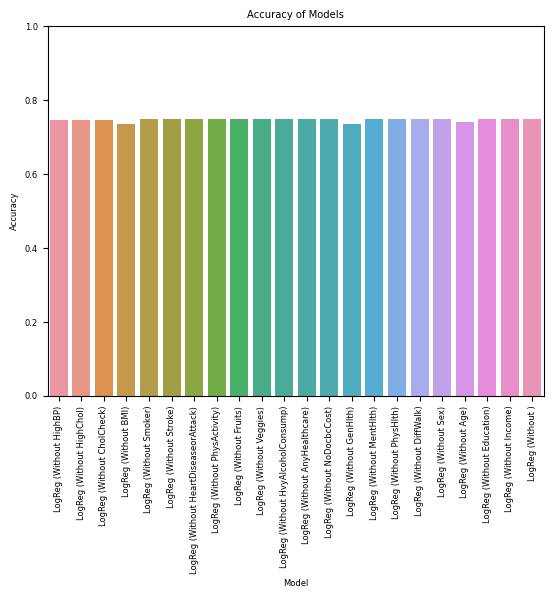

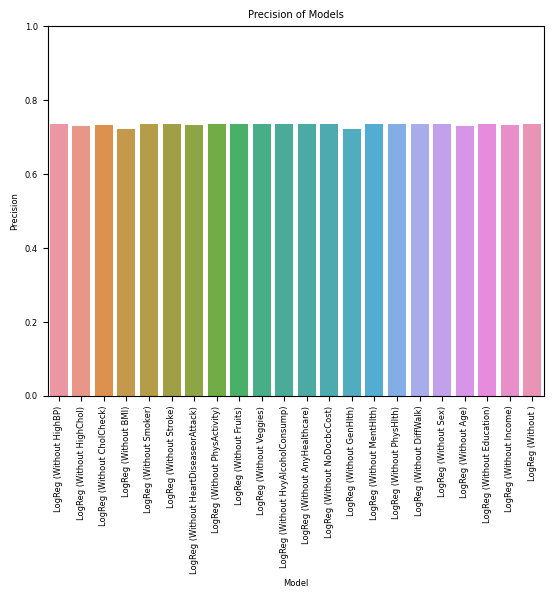

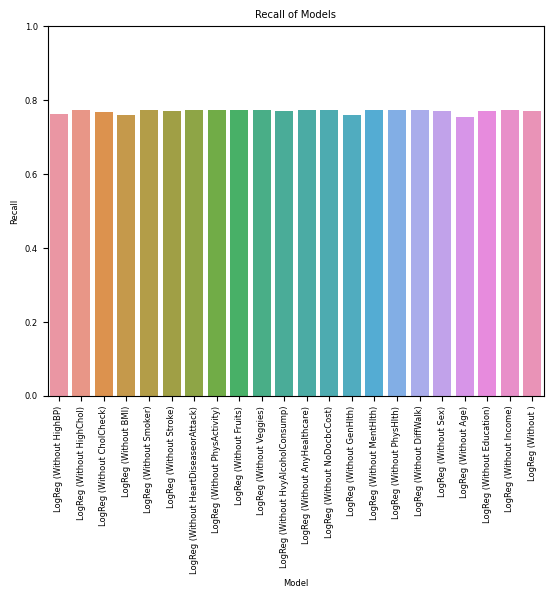

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_models(df, x, y, title, ylim):  
  plt.xticks(rotation=90)
  sns.barplot(df, x=x, y=y).set(title=title, ylim=ylim)
  plt.show()
  plt.clf()
  print()

# make font size slightly smaller
plt.rcParams.update({"font.size": 6})

# y limits for accuracy, precision, recall
metric_lim = (0, 1)

# plot models and compare their accuracy, precision, and recall scores
plot_models(model_df, "Model", "Accuracy", "Accuracy of Models", metric_lim)
plot_models(model_df, "Model", "Precision", "Precision of Models", metric_lim)
plot_models(model_df, "Model", "Recall", "Recall of Models", metric_lim)


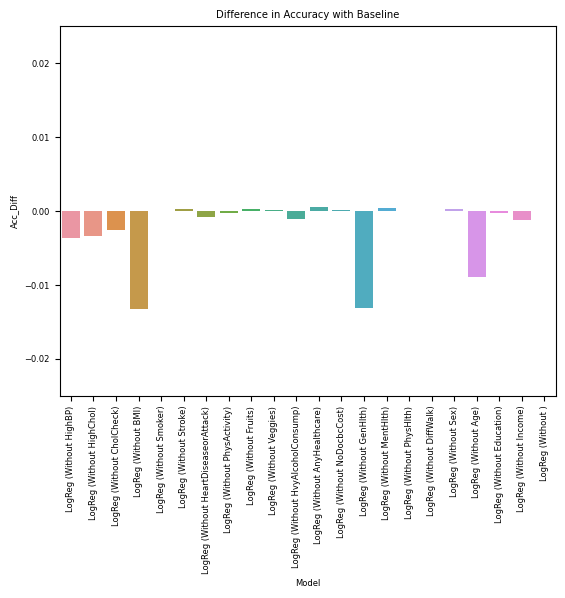

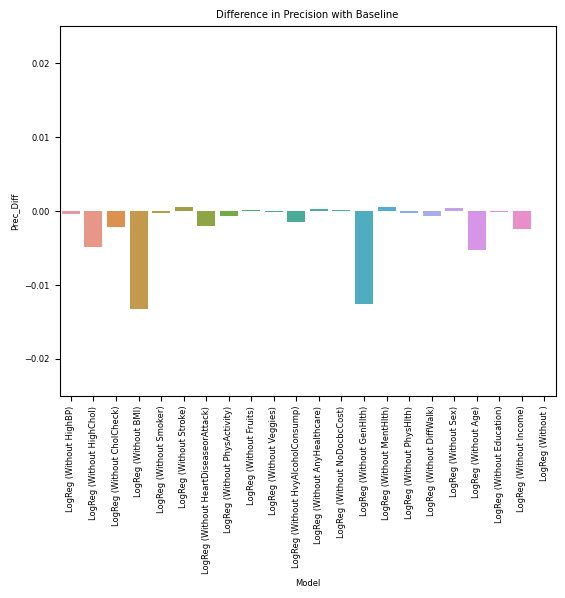

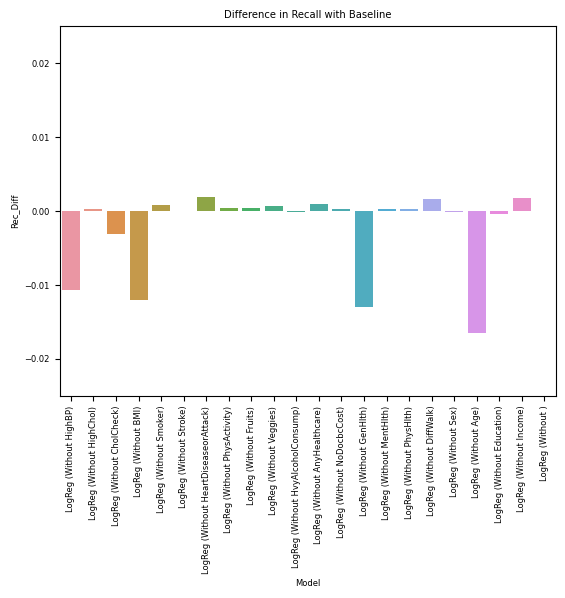

<Figure size 640x480 with 0 Axes>

In [ ]:
# y limits for difference between baseline model and other models
diff_lim = (-.025, .025)

# plot differences between baseline model and each removed factor's model
plot_models(model_df, "Model", "Acc_Diff", "Difference in Accuracy with Baseline", diff_lim)
plot_models(model_df, "Model", "Prec_Diff", "Difference in Precision with Baseline", diff_lim)
plot_models(model_df, "Model", "Rec_Diff", "Difference in Recall with Baseline", diff_lim)